In [70]:
import csv

crime_list = []
stress_list = []

# 경제활동.csv 파일 처리
with open("team_data/비경제활동.csv", encoding='cp949') as f:
    data = csv.reader(f)
    data = list(data)
    for i in data:
        for z in i[2:]:
            if z == '-':
                crime_list.append(0.0)  # '-'를 0.0으로 대체
            else:
                try:
                    crime_list.append(float(z))
                except ValueError:
                    print(f"변환 불가 값 (crime_list): {z}")  # 변환 불가한 값을 출력해 확인
                    continue
            
    print("crime_list:", crime_list)

# stress1.csv 파일 처리
with open('team_data/stress1.csv', encoding='utf-8') as f2:
    data = csv.reader(f2)
    next(data)
    data = list(data)
    for i in data:
        for z in i[1:-1]:
            try:
                stress_list.append(float(z))
            except ValueError:
                print(f"변환 불가 값 (stress_list): {z}")  # 변환 불가한 값을 출력해 확인
                continue
            
    print("stress_list:", stress_list)


crime_list: [3220.0, 3211.0, 3161.0, 3186.0, 3159.0, 3223.0, 3221.0, 3171.0, 3150.0, 1238.0, 1247.0, 1226.0, 1247.0, 1219.0, 1237.0, 1234.0, 1209.0, 1184.0, 805.0, 802.0, 817.0, 824.0, 838.0, 859.0, 825.0, 812.0, 800.0, 867.0, 863.0, 878.0, 858.0, 876.0, 910.0, 920.0, 906.0, 914.0, 498.0, 504.0, 494.0, 483.0, 486.0, 497.0, 508.0, 507.0, 491.0, 494.0, 496.0, 505.0, 500.0, 485.0, 471.0, 477.0, 475.0, 474.0, 380.0, 378.0, 372.0, 371.0, 370.0, 379.0, 386.0, 372.0, 365.0, 0.0, 0.0, 79.0, 88.0, 96.0, 102.0, 107.0, 108.0, 110.0, 3712.0, 3781.0, 3806.0, 3901.0, 4008.0, 4263.0, 4273.0, 4075.0, 4102.0, 515.0, 517.0, 484.0, 488.0, 462.0, 480.0, 478.0, 478.0, 463.0, 484.0, 495.0, 495.0, 487.0, 492.0, 489.0, 496.0, 478.0, 474.0, 684.0, 721.0, 657.0, 639.0, 647.0, 667.0, 672.0, 653.0, 645.0, 621.0, 609.0, 627.0, 629.0, 610.0, 600.0, 582.0, 564.0, 545.0, 545.0, 545.0, 553.0, 551.0, 536.0, 528.0, 516.0, 491.0, 482.0, 820.0, 823.0, 828.0, 828.0, 830.0, 842.0, 855.0, 826.0, 802.0, 1055.0, 1049.0, 1055.0

In [72]:
import pandas as pd
import numpy as np

# 두 리스트의 길이 확인
print(f"Length of crime_list: {len(crime_list)}")
print(f"Length of stress_list: {len(stress_list)}")

# 두 리스트의 길이를 맞추기 위해 NaN 값 추가
if len(crime_list) > len(stress_list):
    stress_list.extend([np.nan] * (len(crime_list) - len(stress_list)))
elif len(stress_list) > len(crime_list):
    crime_list.extend([np.nan] * (len(stress_list) - len(crime_list)))

df = pd.DataFrame()
df['고혈압'] = crime_list
df['스트레스'] = stress_list

df

Length of crime_list: 153
Length of stress_list: 153


,고혈압,스트레스
0,3220.0,29.7
1,3211.0,30.3
2,3161.0,29.1
3,3186.0,26.8
4,3159.0,26.4
...,...,...
148,168.0,25.4
149,176.0,21.9
150,173.0,24.6
151,164.0,23.8


In [82]:
from matplotlib import pyplot as plt
#%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그래프를 볼 수 있게 하는 기능

plt.rc('font', family='Malgun Gothic')
plt.scatter(df['스트레스'], df['고혈압']) 
plt.show() #그래프 표시


KeyError: '비경제'

In [76]:
correlation = df.corr()
print(correlation)

           고혈압      스트레스
고혈압   1.000000  0.258023
스트레스  0.258023  1.000000


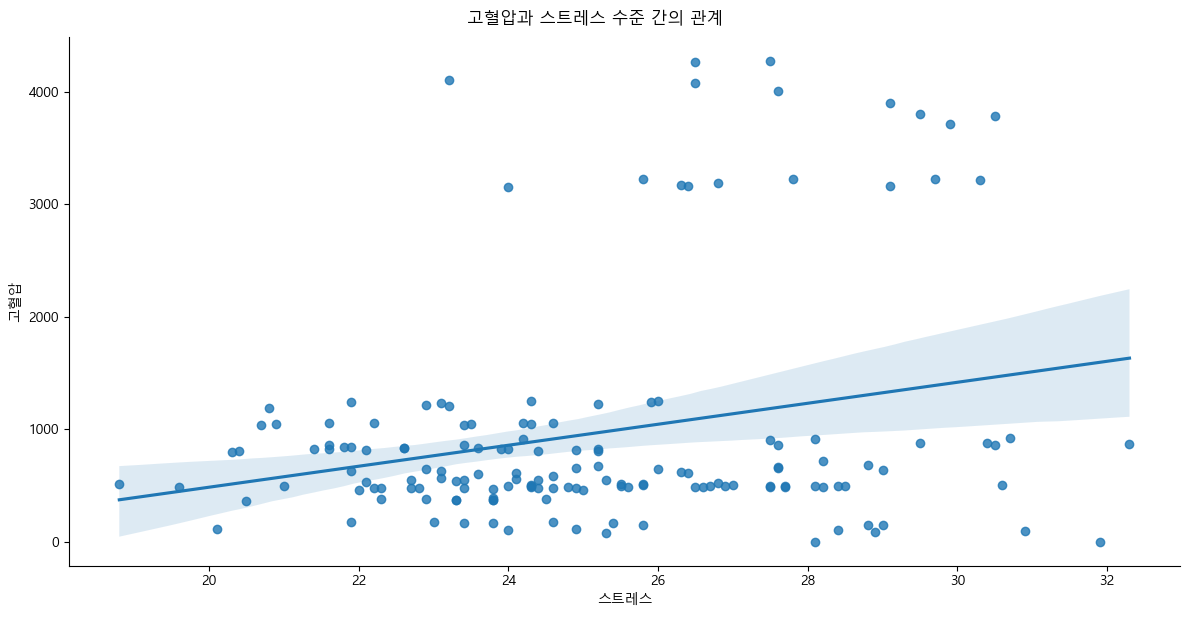

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.lmplot(x='스트레스', y='고혈압', data=df, height=6, aspect=2)
plt.suptitle('고혈압과 스트레스 수준 간의 관계', y=1.02)
plt.show()